# Module 9 Lab Assignment

In [ ]:
import pandas as pd
import numpy as np

In this lab, you will work a dataset that belongs to a MOOC. The dataset contains the following columns:

* **StudentId**: Id of the student
* **Age**: The age of the student
* **Education**: The education level of the student. 1: Highschool, 2: Undergrad, 3: Master, 4: PhD.
* **Exam1**: First midterm score [ranges between 0 to 100]
* **Exam2**: Second midterm score [ranges between 0 to 100]
* **Final**: Final exam score [ranges between 0 to 100]
* **Discussion**: Number of discussion posts
* **Tutorial**: Number of visits to tutorial pages
* **Video**: Number of views of course videos
* **Assignment**: Number of assignments submitted [ranges between 0 to 4].

**TASK#1:** Import the data into a dataframe called `data`, and display the top 3 columns:

`[+3]`

In [ ]:
data = pd.read_excel('student-data.xlsx')
data.head(3)

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1,45.0,55,60.0,1,16,13,2
1,72,16,1,65.0,33,40.0,3,5,7,2
2,82,17,1,68.0,48,35.0,3,8,20,2


In [ ]:
#From the task it says top 3 columns but i assumed it asks for top 3 rows so i showed rows. But if it is correct then for thr top 3 columns:
#data.iloc[:,:3]

In [ ]:
data.shape

(708, 10)

**TASK#2:** There are some missing values in some columns. Display the count of missing values per each column. 

The output should look like this:

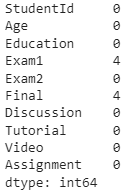

`[+3]`

In [ ]:
data.isna().sum()

StudentId     0
Age           0
Education     0
Exam1         4
Exam2         0
Final         4
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#3:** Fill the missing values in `Exam1` column with the average `Exam1` of the `Education` level that the student belongs to. 

For example, assume that student A's `Exam1` score is unknown. This student's education level is *Higher Education*. Then, the `Exam1` score of this student should be set to the average `Exam1` score of all students from *Higher Education*. 

`[+10]`

In [ ]:
data.groupby(by='Education').mean()['Exam1']

Education
1    47.682353
2    60.123596
3    78.535135
4    80.461988
Name: Exam1, dtype: float64

In [ ]:
data[data['Exam1'].isna()==True].index

Int64Index([11, 76, 205, 385], dtype='int64')

In [ ]:
data.iloc[[11, 76, 205, 385]]

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
11,172,17,1,NaN,68,45.0,0,11,14,2
76,522,23,1,NaN,27,66.0,0,8,17,0
205,559,23,2,NaN,78,80.0,1,19,7,2
385,375,36,3,NaN,92,92.0,7,24,15,3


In [ ]:
data.loc[11, 'Exam1'] = 48
data.loc[76, 'Exam1'] = 48
data.loc[205, 'Exam1'] = 60
data.loc[385, 'Exam1'] = 79

In [ ]:
data.iloc[[11, 76, 205, 385]]

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
11,172,17,1,48.0,68,45.0,0,11,14,2
76,522,23,1,48.0,27,66.0,0,8,17,0
205,559,23,2,60.0,78,80.0,1,19,7,2
385,375,36,3,79.0,92,92.0,7,24,15,3


In [ ]:
data.isna().sum()

StudentId     0
Age           0
Education     0
Exam1         0
Exam2         0
Final         4
Discussion    0
Tutorial      0
Video         0
Assignment    0
dtype: int64

**TASK#4:** Fill the missing values in `Final` column with the student's average score in `Exam1` and `Exam2`. In this task the education level does not matter.

HINT: You can simply use `fillna` method on `Final` column (no `apply` or `lambda` function is necessary).

`[+8]`

In [ ]:
data[data['Final'].isna()==True]

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
17,253,25,1,54.0,45,NaN,1,7,6,2
115,560,16,1,32.0,30,NaN,0,11,15,4
268,3,29,2,71.0,60,NaN,1,13,10,1
571,672,26,4,78.0,87,NaN,6,13,37,4


In [ ]:
data['Final'].fillna((data['Exam1']+data['Exam2'])/2,inplace=True)

In [ ]:
data.iloc[[17, 115, 268, 571]]

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
17,253,25,1,54.0,45,49.5,1,7,6,2
115,560,16,1,32.0,30,31.0,0,11,15,4
268,3,29,2,71.0,60,65.5,1,13,10,1
571,672,26,4,78.0,87,82.5,6,13,37,4


**TASK#5:** In this task, you need to replace the values in `Education` column with proper labels, given in the following dictionary:

`educationDict = { 1: '1.Highschool', 2:'2.Undergrad', 3:'3.Master', 4:'4.PhD' }`

In [ ]:
educationDict = { 1: '1.Highschool', 2:'2.Undergrad', 3:'3.Master', 4:'4.PhD' }

Now, pass this dictionary into `replace` function, to update the values in the `Education` column:

`[+5]`

In [ ]:
data['Education'].replace(educationDict, inplace=True)

In [ ]:
data.head()

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment
0,10,23,1.Highschool,45.0,55,60.0,1,16,13,2
1,72,16,1.Highschool,65.0,33,40.0,3,5,7,2
2,82,17,1.Highschool,68.0,48,35.0,3,8,20,2
3,83,20,1.Highschool,29.0,24,42.0,2,20,13,3
4,93,24,1.Highschool,54.0,37,61.0,0,5,10,4


**TASK#6:** Now, we are interested in if there is a difference in exam performances depending on the education level. 

Please use `groupby` to compute the average scores of *Exam1*, *Exam2*, and *Final* for each `Education` level. 

`[+8]`

In [ ]:
data.groupby(by='Education').mean()[['Exam1', 'Exam2', 'Final']]

,Exam1,Exam2,Final
Education,,,
1.Highschool,47.686047,44.912791,44.712209
2.Undergrad,60.122905,70.402235,75.064246
3.Master,78.537634,78.720430,78.639785
4.PhD,80.461988,79.228070,79.745614


In [ ]:
ploting_data = data.groupby(by='Education').mean()[['Exam1', 'Exam2', 'Final']]

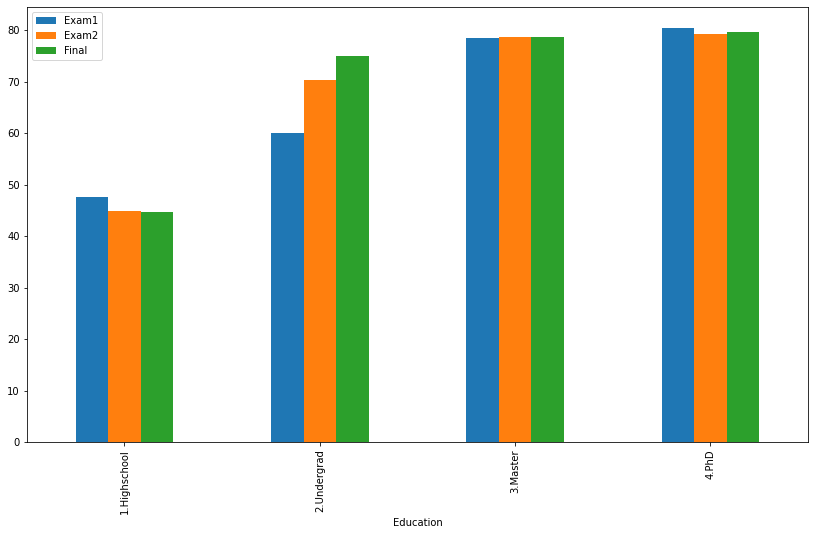

In [ ]:
ploting_data.plot.bar(figsize=(14, 8))

### We can see from the bar chart that as the education level goes higher, the grades are getting higher as well.

**TASK#7**: Based on the dataset obtained in the previous task, please find for which Education level there is an increase in the average scores from Exam1 to Exam2 and from Exam2 to Final.

Here, you can utilize `pct_change` function.

The output of your code should look like this:

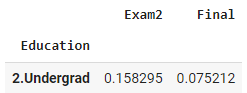
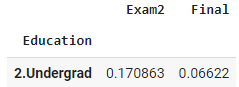

`[+12]`

In [ ]:
data.groupby(by='Education').mean()[['Exam1', 'Exam2']].pct_change()

,Exam1,Exam2
Education,,
1.Highschool,NaN,NaN
2.Undergrad,0.260807,0.567532
3.Master,0.306285,0.118152
4.PhD,0.024502,0.006449


In [ ]:
data.groupby(by='Education').mean()[['Exam2', 'Final']].pct_change()

,Exam2,Final
Education,,
1.Highschool,NaN,NaN
2.Undergrad,0.567532,0.678831
3.Master,0.118152,0.047633
4.PhD,0.006449,0.014062


**TASK#8:** The `Assignment` column indicates the number of submissions submitted by the students (between 0-4). It is expected that students who submit their assignments will show better performance in the final exam.

To explore this relationship, please compute the average `Final` grade for each distinct vauel of `Assignment` column.

Make a one-sentence comment about the relationship between the number of assignments submitted and the final scores.

`[+7]`

In [ ]:
data.groupby(by='Assignment').mean()['Final']

Assignment
0    47.675000
1    62.811224
2    71.639474
3    74.575916
4    71.283069
Name: Final, dtype: float64

**We can see that the *increase* in final grades is directly proportional to the number of assignments.**

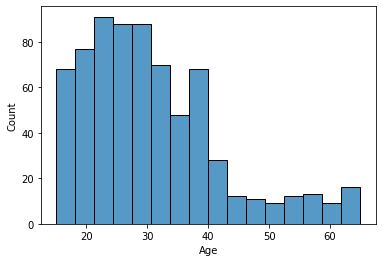

In [ ]:
import seaborn as sns
sns.histplot(data['Age'])

In this histogram,  we can say that most of the students are at age 20-30.

**TASK#9:** In this task, the goal is to construct a new dataframe that has two columns: 

* `ExamAvg` (the average of `Exam1`, `Exam2`, and `Final`)
* `Visits` (the average of the `Tutorial` and `Video` columns). 

You should use `groupby` function and pass a dictionary (possible called *mapping*) to this function.

Below is a sample view from the output:

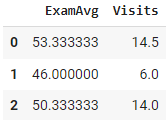

`[+8]`

In [ ]:
d = {'ExamAvg' : (data['Exam1'] + data['Exam2'] + data['Final'])/3,
     'Visits' : (data['Tutorial'] + data['Video'])/2 }

In [ ]:
d

{'ExamAvg': 0      53.333333
 1      46.000000
 2      50.333333
 3      31.666667
 4      50.666667
          ...    
 703    84.000000
 704    84.000000
 705    79.333333
 706    88.000000
 707    70.000000
 Length: 708, dtype: float64, 'Visits': 0      14.5
 1       6.0
 2      14.0
 3      16.5
 4       7.5
        ... 
 703    10.5
 704    18.5
 705    23.0
 706    25.5
 707    20.5
 Length: 708, dtype: float64}

In [ ]:
newData = pd.DataFrame(data=d)
newData.head()

,ExamAvg,Visits
0,53.333333,14.5
1,46.000000,6.0
2,50.333333,14.0
3,31.666667,16.5
4,50.666667,7.5


**TASK#10:** Create four bins (or buckets) from the existing data based on students' final grades. The lower-upper boundries for each bin are provided below, along with the labels:

* 0-59: Fails
* 60-69: Low Performers
* 70-84: Medium Performers
* 85-100: High Performers

The expected output is provided below:

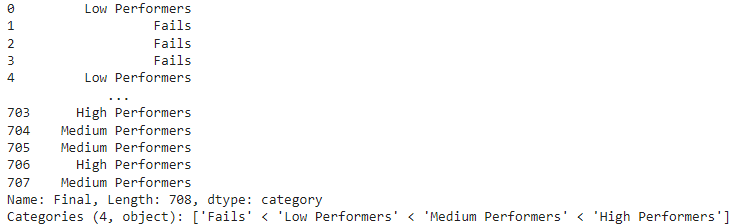

`[+9]`

In [ ]:
bins = [0, 59, 69, 84, 100]
labels = ['Fails', 'Low Performers', 'Medium Performers', 'High Performers']

In [ ]:
data['final grade'] = pd.cut(data['Final'], bins=bins, labels=labels )

In [ ]:
data['final grade']

0         Low Performers
1                  Fails
2                  Fails
3                  Fails
4         Low Performers
             ...        
703      High Performers
704    Medium Performers
705    Medium Performers
706      High Performers
707    Medium Performers
Name: final grade, Length: 708, dtype: category
Categories (4, object): ['Fails' < 'Low Performers' < 'Medium Performers' < 'High Performers']

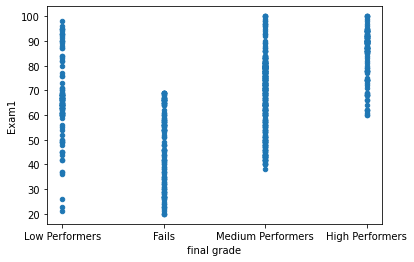

In [ ]:
data.plot.scatter(x='final grade', y='Exam1')

### From the scatter plot, we can see the difference between failing students, medium performers and high performers based on exam1 but we can not get a healhty information from low performers based on exam1.

**TASK11:** Now, you need to display the number of students at the intersection of performance levels and education levels. We are interested in knowing the educationa levels of high performing students and low performing students.

You can use `crosstab` function. The output should look like this:

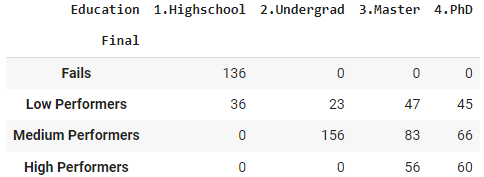

`[+9]`

In [ ]:
pd.crosstab(data['final grade'],data['Education'])

Education,1.Highschool,2.Undergrad,3.Master,4.PhD
final grade,,,,
Fails,136,0,0,0
Low Performers,31,1,43,43
Medium Performers,5,178,84,63
High Performers,0,0,59,65


**TASK#12:** In the following several tasks, we are interested in exploring if students' age has any effect on their performance.

First, create a equal-length 4 buckets based on the ages of the students.

The output should look like this:

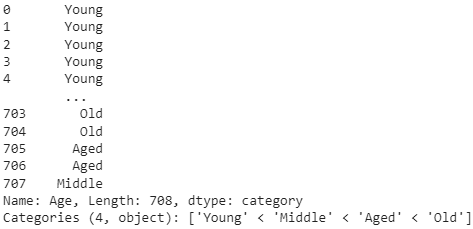

`[+9]`

In [ ]:
data.Age.describe()

count    708.000000
mean      30.635593
std       11.143400
min       15.000000
25%       23.000000
50%       28.000000
75%       37.000000
max       65.000000
Name: Age, dtype: float64

In [ ]:
bins_age = [15, 27.5, 40, 52.5, 65]
labels_age = ['Young', 'Middle', 'Aged', 'Old']

In [ ]:
data['Age Labeled'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age )

In [ ]:
data['Age Labeled']

0       Young
1       Young
2       Young
3       Young
4       Young
        ...  
703       Old
704       Old
705      Aged
706      Aged
707    Middle
Name: Age Labeled, Length: 708, dtype: category
Categories (4, object): ['Young' < 'Middle' < 'Aged' < 'Old']

In [ ]:
data.head()

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment,final grade,Age Labeled
0,10,23,1.Highschool,45.0,55,60.0,1,16,13,2,Low Performers,Young
1,72,16,1.Highschool,65.0,33,40.0,3,5,7,2,Fails,Young
2,82,17,1.Highschool,68.0,48,35.0,3,8,20,2,Fails,Young
3,83,20,1.Highschool,29.0,24,42.0,2,20,13,3,Fails,Young
4,93,24,1.Highschool,54.0,37,61.0,0,5,10,4,Low Performers,Young


**TASK13:** Next, group data based on age categories, and compute the followings:

* Exam1, Exam2: *Average*,
* Discussion	Tutorial	Video: *Average, Minimum value, and Maximum Value*

The output should look like this:

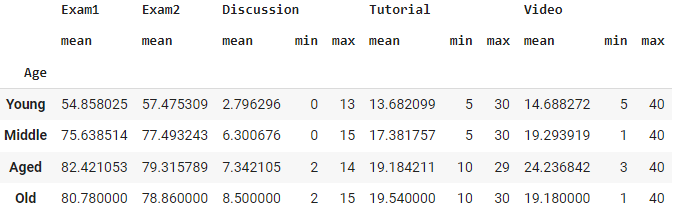

[+9]

In [ ]:
data.groupby(by='Age Labeled').agg({'Exam1': 'mean', 
                                    'Exam2' : 'mean', 
                                    'Discussion': ['min', 'max', 'mean'],
                                    'Tutorial': ['min', 'max', 'mean'],
                                    'Video': ['min', 'max', 'mean'],
                                    })

Exam1      Exam2 Discussion               Tutorial      \
                  mean       mean        min max      mean      min max   
Age Labeled                                                               
Young        55.472131  58.252459          0  13  2.895082        5  30   
Middle       75.638514  77.493243          0  15  6.300676        5  30   
Aged         82.421053  79.315789          2  14  7.342105       10  29   
Old          80.780000  78.860000          2  15  8.500000       10  30   

                       Video                 
                  mean   min max       mean  
Age Labeled                                  
Young        13.836066     5  40  14.859016  
Middle       17.381757     1  40  19.293919  
Aged         19.184211     3  40  24.236842  
Old          19.540000     1  40  19.180000

In [ ]:
data

,StudentId,Age,Education,Exam1,Exam2,Final,Discussion,Tutorial,Video,Assignment,final grade,Age Labeled
0,10,23,1.Highschool,45.0,55,60.0,1,16,13,2,Low Performers,Young
1,72,16,1.Highschool,65.0,33,40.0,3,5,7,2,Fails,Young
2,82,17,1.Highschool,68.0,48,35.0,3,8,20,2,Fails,Young
3,83,20,1.Highschool,29.0,24,42.0,2,20,13,3,Fails,Young
4,93,24,1.Highschool,54.0,37,61.0,0,5,10,4,Low Performers,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
703,646,54,4.PhD,74.0,82,96.0,10,10,11,3,High Performers,Old
704,650,53,4.PhD,94.0,86,72.0,15,13,24,3,Medium Performers,Old
705,683,46,4.PhD,82.0,78,78.0,8,19,27,3,Medium Performers,Aged
706,684,49,4.PhD,89.0,80,95.0,9,12,39,3,High Performers,Aged


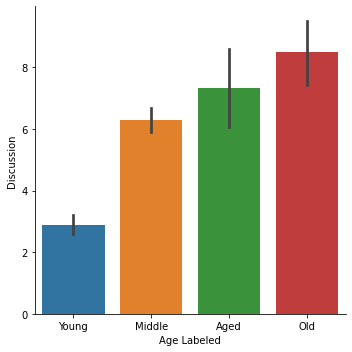

In [ ]:
import seaborn as sns 
sns.catplot(x='Age Labeled', y='Discussion', kind='bar',data=data)

when we look at the categorized age, we can see that old people joined discussions more.

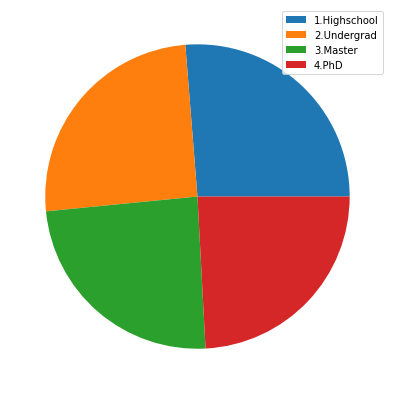

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,7))
plt.pie(data['Education'].value_counts())
plt.legend(data['Education'].unique())
plt.show()

from the pie chart we can say that education levels are almoat equally distributed in our dataset.